# 6.2: Linear Regression Exercises

### Getting Started
#### Import Libraries 
We import our standard libraries and specific objects/libraries at the top level of our notebook. By adding only specific objects from key modules, such as `statmodels`, we keep our *namespace* more organized. 

In [6]:
# Import libraries and objects
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

Let's take a look at the `Boston` data set

In [7]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [5]:
Boston_copy = Boston.copy()
Boston_copy

NameError: name 'Boston' is not defined

Hint: Type `Boston?` to find out more about the dataset.

## Simple Linear Regression

In this section we will construct model matrices (also called design matrices) using the `ModelSpec()` transform from `ISLP.models`. 

We will use the `Boston` housing data set, which is part of the `ISLP` package. We will build a regression model to predict `medv` using 13 predictors such as `rmvar` (average number of rooms per house), `age` (proportion of owner-occupied units built prior to 1940), and `lstat` (percent of households with low socioeconomic status). We will use the `statsmodels` package, which allows us to implement several commonly used regression methods.

To start, we use the `sm.OLS()` function to fit a simple linear regression model. Our response will be `medv` (Y) and `rm` (X) will be the single predictor. For this model, we can create the model matrix by hand.

In [9]:
# Create the model matrix by hand
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'rm': Boston['rm']})
X[:4]

,intercept,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998


: 

We then extract the response and fit the model.

In [5]:
# Extract the response and fit the model
y = Boston['medv']
model = sm.OLS(y, X) # to specify the model
results = model.fit() # to fit the model

**Note**: `sm.OLS()` does not fit the model; it specifies the model. `model.fit()` does the actual fitting.

The `ISLP` function `summarize()` produces a simple table of the parameter estimates, their standard errors, t-statistics and p-values. The function takes a single argument, such as the object `results` returned here by the `fit` method, and returns such a summary.

In [6]:
# Summarize results
summarize(results)

,coef,std err,t,P>|t|
intercept,-34.6706,2.650,-13.084,0.0
rm,9.1021,0.419,21.722,0.0


The output tells us that ˆβ0 = −34.6706 and ˆβ1 = 9.1021

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           2.49e-74
Time:                        19:13:56   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the params attribute of results.

In [ ]:
coefficients = results.params
print(coefficients)

To compute the 95% confidence intervals for the regression coefficient estimates based on the standard errors:

In [ ]:
# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

We can also find the RSE and $R^2$ statistic in the summary of the linear regression model.

In [ ]:
print(results.summary())

From the $R^2$ statistic we can see that some of the variation in `medv` is explained by `rm` but a lot of it is not. This might be an indication that there are other variables in the data set that are affecting the response.

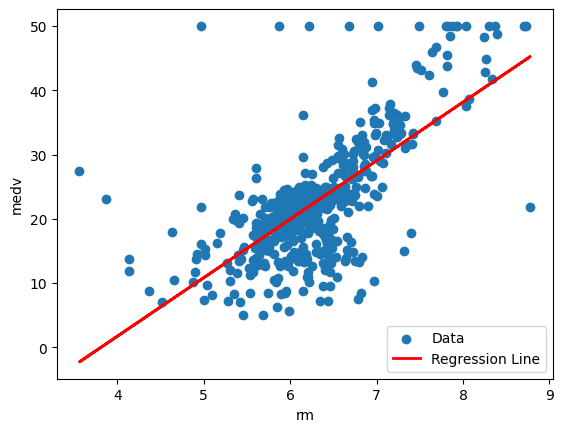

In [8]:
# Extracting 'medv' and 'rm' columns from the dataset
medv = Boston['medv']
rm = Boston['rm']

# Reshape 'rm' to a 2D array for LinearRegression
rm_reshaped = rm.values.reshape(-1, 1)

# Fit a linear regression model
lm_medv_rm = LinearRegression()
lm_medv_rm.fit(rm_reshaped, medv)

# Plot 'medv' against 'rm'
plt.scatter(rm, medv, label='Data')
plt.xlabel('rm')
plt.ylabel('medv')

# Plot the regression line
plt.plot(rm, lm_medv_rm.predict(rm_reshaped), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

### Multiple Linear Regression

To fit a multiple linear regression model using least squares, we again use the `ModelSpec()` transform to construct the required model matrix and response. The arguments to `ModelSpec()` can be quite general, but in this case a list of column names is fine. We consider a fit here with the two variables `rm` and `nox`.

In [ ]:
X = MS(['rm', 'nox']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

Notice how we have compacted the first line into a succinct expression describing the construction of `X`.

The `Boston` data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [ ]:
terms = Boston.columns.drop('medv')
terms

We can now fit the model with all the variables in `terms` using the same model matrix builder.

In [ ]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, `age` has a high $p$`-value`. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except `age`.

In [ ]:
minus_age = Boston.columns.drop(['medv', 'age']) 
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

### Qualitative Predictors

Here we use the `Boston` data again. 

We can examine the relationship between `medv` and `chas`, where
\begin{align*}
\text{chas} = \left\{\begin{array}{ll}
1 & \text { if } \text{tract bounds Charles River} \\
0 & \text { if } \text{not}
\end{array}\right. 
\end{align*}

In [ ]:
# Perform regression
model = sm.OLS.from_formula('medv ~ chas', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

$\hat \beta_0 = 22.094$: the average median house value for suburbs that are not bound by the Charles river.

$\hat \beta_1 = 6.346$: the difference in the average median house value for suburbs that are bound by the Charles River versus those that are not.

### Interaction Term

Let's look at the relationship between the response `medv` and the predictors `lstat` (the percent of households with low socioeconomic status) and `age` (the percent of homes built prior to 1940). We can also include the interaction term between `lstat` and `age`.

The syntax used to implement this is `lm(y ~ x1 + x2 + x1:x2, data)` or `lm(y ~ x1 * x2, data)` for shorthand.

In [10]:
model = sm.OLS.from_formula('medv ~ lstat * age', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.86e-88
Time:                        20:36:33   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

The interaction term has a $p$-value of $0.025$. Even though the $p$-value for `age` is not significant, we will still include it in our model due to the hierarchical principal.

### Helpful plots

There are a few plots that we discussed that can help to identify problems with our data or with our fit.

In [ ]:
model = sm.OLS.from_formula('medv ~ rm', data=Boston)
result = model.fit()

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(result, 'rm', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(result.fittedvalues, result.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

In [ ]:
# Fit a linear regression model
model = sm.OLS.from_formula('medv ~ rm', data=Boston)
result = model.fit()

# Get the predicted values and studentized residuals
predicted_values = result.predict()
studentized_residuals = result.get_influence().resid_studentized_internal

# Plot the Studentized Residuals vs. Fitted Values
plt.scatter(predicted_values, studentized_residuals, alpha=0.8)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

***What information about our fitted model can you gather from these plots? Are there any outliers or high leverage points?***

***Fit a linear regression model on the `Boston` data set including all the predictors. The shorthand for this is `lm(medv ~ .)`. Interpret the summary including the hypothesis tests for the coefficients and the RSE and $R^2 values. Make plots of the fit including confidence intervals for the fitted line. Recreate and interpret the three plots we have just made using your new fit.***

Ask for help if you get stuck!


*These exercises were adapted from :* James, Gareth, et al. An Introduction to Statistical Learning: with Applications in Python, Springer, 2023.